c:\Users\18126\miniconda3\envs\torchcv\lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1, Loss: 2.6030
Epoch 2, Loss: 2.3251
Epoch 3, Loss: 2.2958
Epoch 4, Loss: 2.2834
Epoch 5, Loss: 2.2788
Epoch 6, Loss: 2.2728
Epoch 7, Loss: 2.2694
Epoch 8, Loss: 2.2669
Epoch 9, Loss: 2.2654
Epoch 10, Loss: 2.2628
Epoch 11, Loss: 2.2618
Epoch 12, Loss: 2.2617
Epoch 13, Loss: 2.2589
Epoch 14, Loss: 2.2583
Epoch 15, Loss: 2.2580
Epoch 16, Loss: 2.2565
Epoch 17, Loss: 2.2567
Epoch 18, Loss: 2.2567
Epoch 19, Loss: 2.2559
Epoch 20, Loss: 2.2555
Epoch 21, Loss: 2.2535
Epoch 22, Loss: 2.2530
Epoch 23, Loss: 2.2532
Epoch 24, Loss: 2.2527
Epoch 25, Loss: 2.2526
Epoch 26, Loss: 2.2531
Epoch 27, Loss: 2.2519
Epoch 28, Loss: 2.2524
Epoch 29, Loss: 2.2516
Epoch 30, Loss: 2.2517
Epoch 31, Loss: 2.2514
Epoch 32, Loss: 2.2507
Epoch 33, Loss: 2.2500
Epoch 34, Loss: 2.2503
Epoch 35, Loss: 2.2510
Epoch 36, Loss: 2.2491
Epoch 37, Loss: 2.2499
Epoch 38, Loss: 2.2490
Epoch 39, Loss: 2.2488
Epoch 40, Loss: 2.2494
Epoch 41, Loss: 2.2495
Epoch 42, Loss: 2.2488
Epoch 43, Loss: 2.2481
Epoch 44, Loss: 2.24

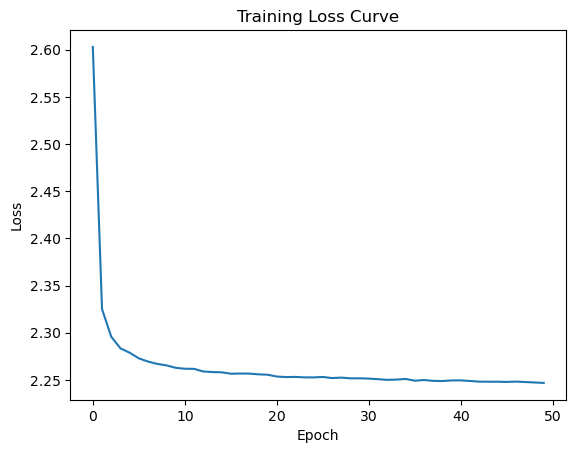


Generated text sample:
The the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


In [ ]:
import torch
import torch.nn as nn
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from torch.utils.data import Dataset, DataLoader

# Web Scraping Function: Quotes to Scrape
def scrape_quotes(num_pages=5):
    quotes_text = []
    for page in range(1, num_pages + 1):
        url = f"http://quotes.toscrape.com/page/{page}/"
        try:
            response = requests.get(url, timeout=10)
            soup = BeautifulSoup(response.text, 'html.parser')
            quotes = soup.find_all('span', class_='text')
            quotes_text += [q.get_text() for q in quotes]
        except Exception as e:
            print(f"Failed on page {page}: {e}")
            break
    return ' '.join(quotes_text) if quotes_text else "No data found."

# Prepare dataset
text_data = scrape_quotes()
chars = sorted(list(set(text_data)))
vocab_size = len(chars)
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

# Dataset and DataLoader
class TextDataset(Dataset):
    def __init__(self, text, seq_length=30):
        self.data = [char_to_idx[ch] for ch in text]
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.seq_length])
        y = torch.tensor(self.data[idx+1:idx+self.seq_length+1])
        return x, y

dataset = TextDataset(text_data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Mini-Transformer Model
class MiniTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_model)
        self.pos = nn.Embedding(1000, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=256)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.readout = nn.Linear(d_model, vocab_size)

    def forward(self, x):
        x_emb = self.embed(x)
        positions = torch.arange(0, x.size(1)).unsqueeze(0).to(x.device)
        x = x_emb + self.pos(positions)
        x = self.transformer(x)
        return self.readout(x)

model = MiniTransformer(vocab_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training Loop
losses = []
for epoch in range(50):  
    model.train()
    total_loss = 0
    for x, y in dataloader:
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output.transpose(1,2), y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# Plot Loss
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()